In [2]:
from pathlib import Path
import sys
project_root = next((parent for parent in [Path.cwd()] + list(Path.cwd().parents) if (parent / "pyproject.toml").exists()), Path.cwd())
sys.path.append(str(project_root))

In [3]:
output_path = "/tmp/superking_clean.parquet"

In [4]:
from llm_python.datasets.superking import load_superking_with_date

superking_df = load_superking_with_date()

Bucket: gs://trelis-arc/datasets/superking/
Found 140 parquet files in datasets/superking/
Downloaded 1 files, skipped 0 files (already present and unchanged)
Downloaded 2 files, skipped 0 files (already present and unchanged)
Downloaded 3 files, skipped 0 files (already present and unchanged)
Downloaded 4 files, skipped 0 files (already present and unchanged)
Downloaded 5 files, skipped 0 files (already present and unchanged)
Downloaded 6 files, skipped 0 files (already present and unchanged)
Downloaded 7 files, skipped 0 files (already present and unchanged)
Downloaded 8 files, skipped 0 files (already present and unchanged)
Downloaded 9 files, skipped 0 files (already present and unchanged)
Downloaded 10 files, skipped 0 files (already present and unchanged)
Downloaded 11 files, skipped 0 files (already present and unchanged)
Downloaded 12 files, skipped 0 files (already present and unchanged)
Downloaded 13 files, skipped 0 files (already present and unchanged)
Downloaded 14 files, 

In [13]:
import pandas as pd
import pyarrow as pa

df = superking_df.copy()
initial_count = len(df)
df["code"] = df["code"].astype(pd.ArrowDtype(pa.large_string()))
df["reasoning"] = df["reasoning"].astype(pd.ArrowDtype(pa.large_string()))
df = df[(df["date"] < pd.Timestamp("2025-09-11")) | (df["refined_from_id"].isna())]
removed_count = initial_count - len(df)
print(f"Rows removed: {removed_count}")

Rows removed: 773610


DATASET STATISTICS ANALYSIS: superking
1. Computing basic statistics...
📊 Basic Statistics:
   • Unique tasks: 1,147
   • Total programs: 1,690,070
   • Fully correct programs: 194,767 (11.5%)
   • Partially correct programs: 295,947 (17.5%)
   • Completely incorrect programs: 1,199,356 (71.0%)
   • Average correctness rate: 0.182

2. Computing per-task distributions...
📈 Per-task Statistics:
   • Average programs per task: 1473.5
   • Median programs per task: 1110.0
   • Min programs per task: 213
   • Max programs per task: 6544
   • Tasks with 6544 programs (max): 1
   • Tasks with fully correct programs: 795
   • Tasks with no correct programs: 352

3. Computing quantile distribution of programs per task...
📊 Programs per Task - Quantile Distribution:
   • 0th percentile (min): 213.0
   • 25th percentile: 805.5
   • 50th percentile (median): 1110.0
   • 75th percentile: 1401.0
   • 90th percentile: 3151.2000000000007
   • 95th percentile: 5320.900000000001
   • 99th percentile: 59

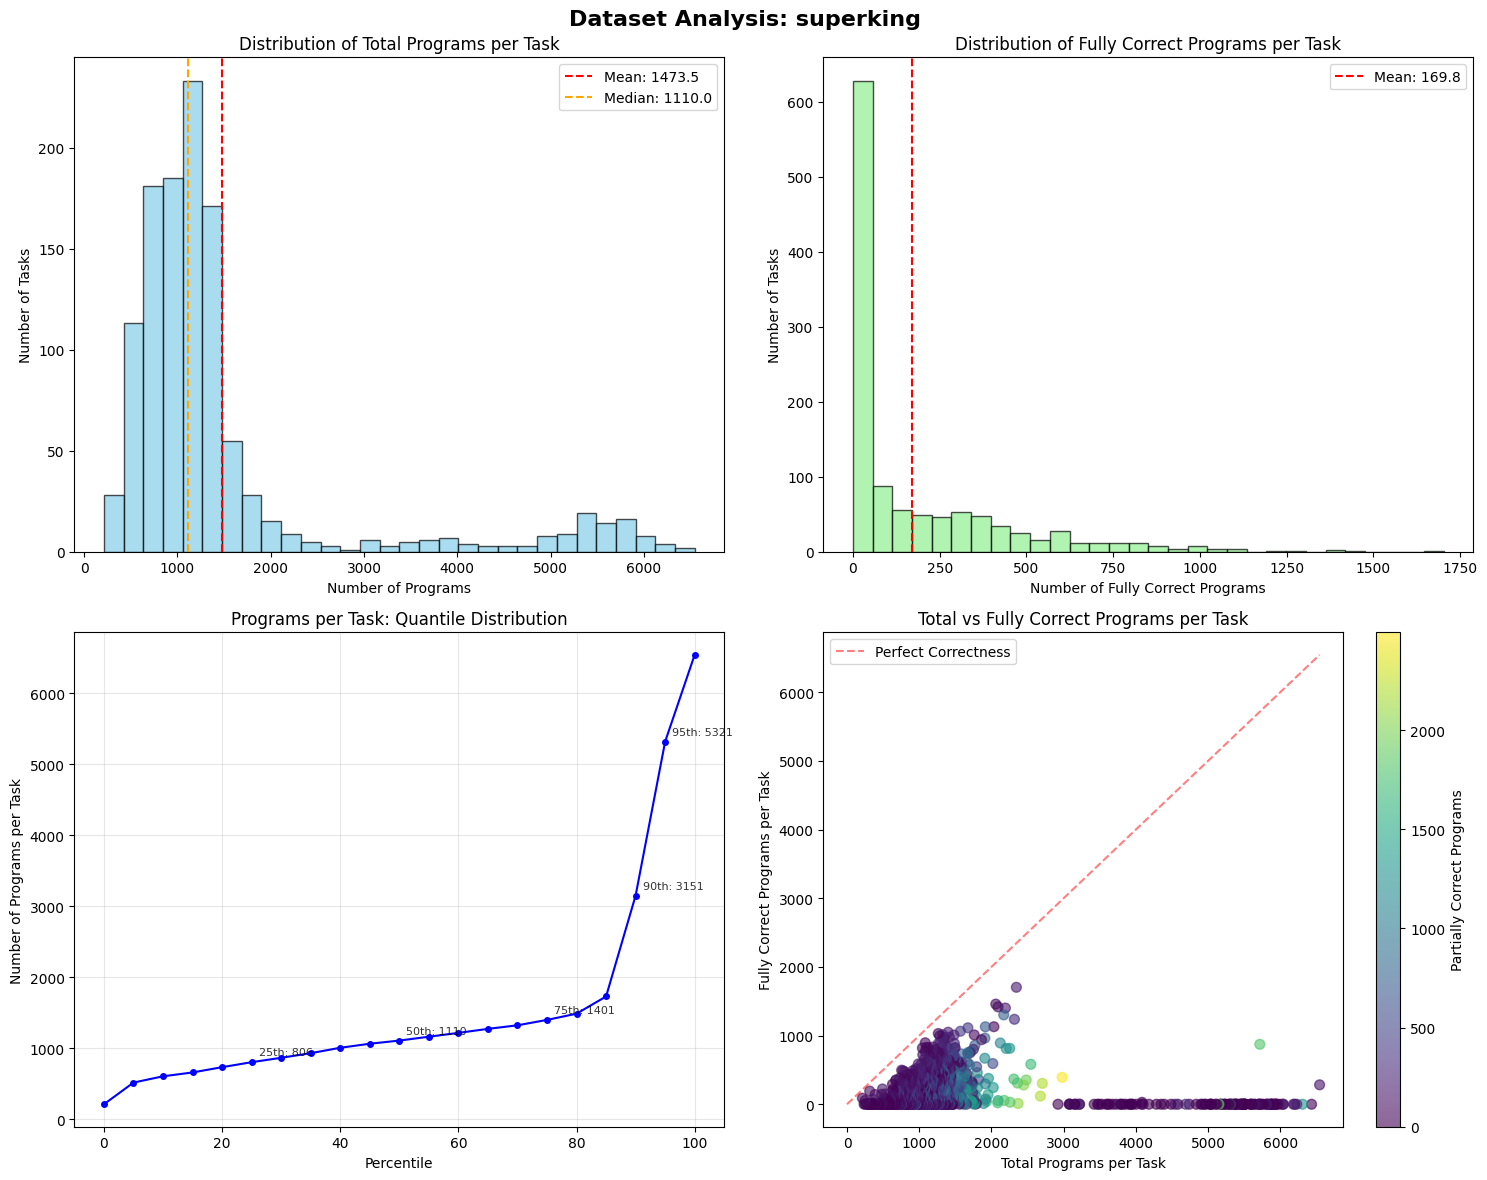


✓ Analysis complete! Generated visualizations showing:
   • Program distribution patterns across tasks
   • Quantile distribution of programs per task
   • Relationship between total and correct programs per task


In [14]:
from llm_python.datasets.statistics import analyze_dataset_statistics

analyze_dataset_statistics(df, "superking")

In [ ]:
import importlib
import llm_python.datasets.schema
importlib.reload(llm_python.datasets.schema)
from llm_python.datasets.io import write_soar_parquet
from llm_python.datasets.schema import PARQUET_SCHEMA


write_soar_parquet(df, output_path, schema=PARQUET_SCHEMA)

: 